In [3]:
import sys
#change to match where the PmagPy folder is on your computer
sys.path.insert(0, '/Users/Laurentia/PmagPy')
import pmag,pmagplotlib,ipmag # import PmagPy functions

import pmag
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def tk03(n=100,dec=0,lat=0,rev='no',G2=0,G3=0):
    """
    Generates vectors drawn from the TK03.gad model of secular
    variation (Tauxe and Kent, 2004) at given latitude and rotated
    about a vertical axis by the given declination.

    Parameters
    ----------
    n : number of vectors to determine (default is 100)
    dec : mean declination of data set (default is 0)
    lat : latitude at which secular variation is simulated (default is 0)
    rev : if reversals are to be included this should be 'yes' (default is 'no')
    G2 : specify average g_2^0 fraction (default is 0)
    G3 : specify average g_3^0 fraction (default is 0)
    """
    tk_03_output=[]
    for k in range(n):
        gh=pmag.mktk03(8,k,G2,G3) # terms and random seed
        long=random.randint(0,360) # get a random longitude, between 0 and 359
        vec= pmag.getvec(gh,lat,long)  # send field model and lat to getvec
        vec[0]+=dec
        if vec[0]>=360.:
            vec[0]-=360.
        if k%2==0 and rev=='yes':
           vec[0]+=180.
           vec[1]=-vec[1]
        tk_03_output.append([vec[0],vec[1],vec[2]])
    return tk_03_output

## G30

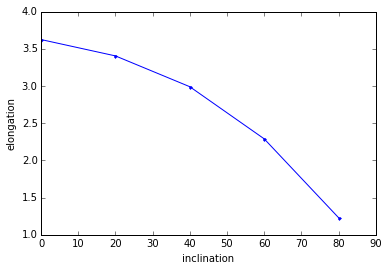

In [6]:
elongation_TK03_G30 = []
inclination_TK03_G30 = []

for inc in range(0,90,20):
    latitude = ipmag.lat_from_inc(inc)
    TK03_array = tk03(n=10000,lat=latitude,G3=0.2)
    ppars = pmag.doprinc(TK03_array)
    elong = ppars['tau2']/ppars['tau3']
    elongation_TK03_G30.append(elong)
    inclination_TK03_G30.append(inc)
    
plt.plot(inclination_TK03_G30, elongation_TK03_G30,'.-')
plt.xlabel('inclination')
plt.ylabel('elongation')
plt.xlim(0,90)
plt.show()

`Laurentia$ tk03.py -n 100000 -lat 0 -G3 0.2`

Then saved results as `TK03_G30_commandline_lat0.txt`

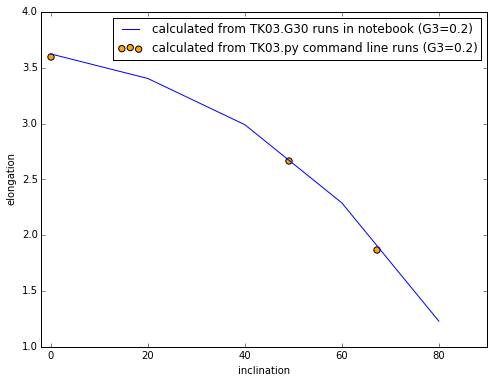

In [14]:
elongation_G30_commandline = []
inclination_G30_commandline = []

TK03_G30_lat0 = np.loadtxt('TK03_G30_commandline_lat0.txt')
ppars = pmag.doprinc(TK03_G30_lat0)
elongation_G30_commandline.append(ppars['tau2']/ppars['tau3'])
inclination_G30_commandline.append(ipmag.inc_from_lat(0))

TK03_G30_lat30 = np.loadtxt('TK03_G30_commandline_lat30.txt')
ppars = pmag.doprinc(TK03_G30_lat30)
elongation_G30_commandline.append(ppars['tau2']/ppars['tau3'])
inclination_G30_commandline.append(ipmag.inc_from_lat(30))

TK03_G30_lat50 = np.loadtxt('TK03_G30_commandline_lat50.txt')
ppars = pmag.doprinc(TK03_G30_lat50)
elongation_G30_commandline.append(ppars['tau2']/ppars['tau3'])
inclination_G30_commandline.append(ipmag.inc_from_lat(50))

# TK03_G30_lat80 = np.loadtxt('TK03_G30_commandline_lat80.txt')
# ppars = pmag.doprinc(TK03_G20_lat80)
# elongation_G30_commandline.append(ppars['tau2']/ppars['tau3'])
# inclination_G30_commandline.append(ipmag.inc_from_lat(80))

plt.figure(figsize=(8,6))
plt.plot(inclination_TK03_G30, elongation_TK03_G30,'b-',label='calculated from TK03.G30 runs in notebook (G3=0.2)')
plt.scatter(inclination_G30_commandline,elongation_G30_commandline,
            s=40,c='orange',label='calculated from TK03.py command line runs (G3=0.2)')
plt.xlabel('inclination')
plt.ylabel('elongation')
plt.xlim(-2,90)
plt.legend()
plt.show()

## G20

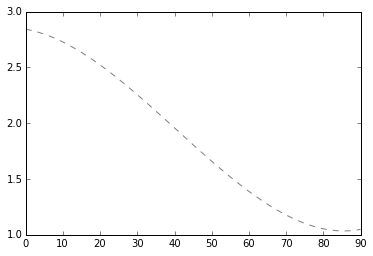

In [12]:
xa = np.linspace(0,90,num=90)
TK03_G20 = 2.842 + -5.961e-3*xa + -6.023e-4*xa**2 + 4.968e-6*xa**3

plt.plot(xa,TK03_G20,color='grey',linestyle='--',label='TK03.G20 E/I relationship (Tauxe et al., 2008)')

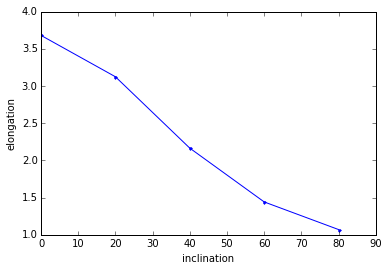

In [15]:
elongation_TK03_G20 = []
inclination_TK03_G20 = []

for inc in range(0,90,20):
    latitude = ipmag.lat_from_inc(inc)
    TK03_array = tk03(n=10000,lat=latitude,G2=0.05)
    ppars = pmag.doprinc(TK03_array)
    elong = ppars['tau2']/ppars['tau3']
    elongation_TK03_G20.append(elong)
    inclination_TK03_G20.append(inc)
    
plt.plot(inclination_TK03_G20, elongation_TK03_G20,'.-')
plt.xlabel('inclination')
plt.ylabel('elongation')
plt.xlim(0,90)
plt.show()